# Empalme con la clase anterior
Asumamos
$p(x) = 6 \sin \left ( \frac{\pi x}{L} \right ) $
$x \in [ 0 , L]$, $L=1$, $c=1$, $t_0=0$, $a=0$, $b=L=1$.


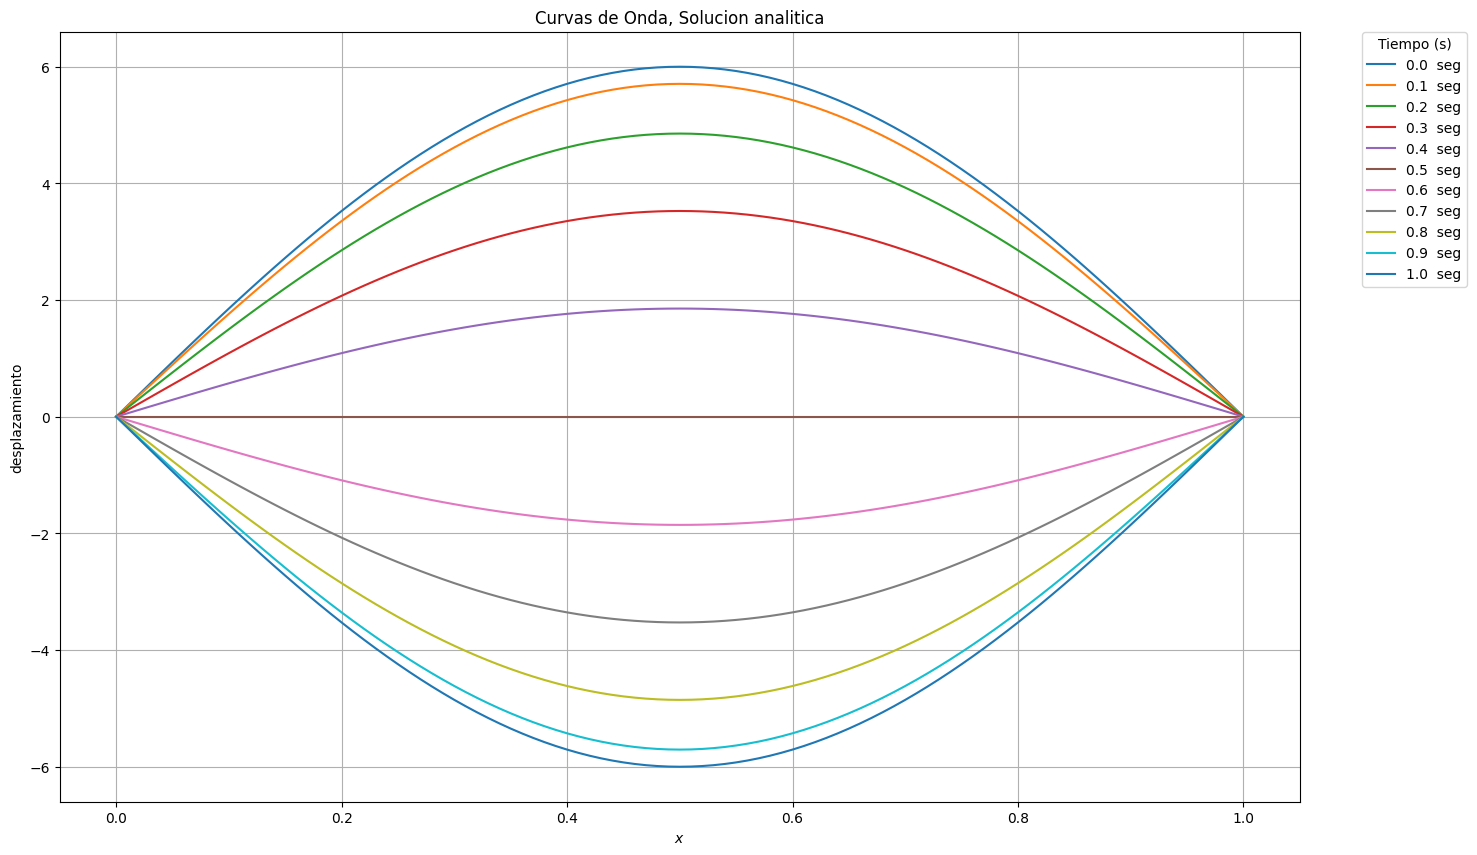

In [ ]:
from re import T
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, array
from matplotlib.pyplot import figure
figure(figsize = (16,10))



# definicion de parametros
a = 0
b=1
t0=0
L=b
dt=0.1
c=1
nx=101

# solucion analitica
def u(x,t):
    return 6*sin(pi*x/L)*cos(c*pi*t/L)

#graficamos las columnas de w
params={'legend.fontsize':5, 'legend.handlength':1}
Ndt=11

# labels and title
plt.xlabel(r"$x$")
plt.ylabel(r"desplazamiento")
plt.title(r"Curvas de Onda, Solucion analitica")

X = np.linspace(a,b,nx)
for j in range(Ndt):
    t = j*dt
    plt.plot(X, u(X,t), label=str( round(t,1)) + '  seg')

plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Tiempo (s)')
plt.show()


In [ ]:
# implementacion del algoritmo
def solve_waveeq(c, a, b, t0, nt, nx, dt, e, f, p, q, g):
    X = np.linspace(a,b,nx)
    cmax = max(c(xx) for xx in X)

    L=b-a
    dx=L/(nx-1)
    gamma=cmax*dt/dx
    stab_cond=dx/cmax

    # test stability
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada. Reduzca dt")
        # return None

    tmax=nt*dt
    t=np.arange(t0,tmax,dt)

    w=np.zeros((nx,nt),dtype=float)
    print("dimensions of w", w.shape)

    # condiciones iniciales
    for i in range(1,nx-1):
        w[i,0]=p(X[i])

    # condiciones de frontera
    for j in range(nt):
        w[0,j] = e(t[j])
        w[nx-1, j]=f(t[j])

    # lleno de capa 1
    for i in range(1, nx-1):
        gamma = c(X[i]) * dt / dx
        w[i,1] = (0.5*gamma**2*p(X[i-1]) + (1.0-gamma**2)*p(X[i]) +
                  0.5*gamma**2*p(X[i+1]) + q(X[i])*dt
                  + 0.5*c(X[i])**2**dt**2*g(X[i], t0))

        # como ya se tienen dos capas se puede iterar en tiempo
    for j in range(1, nt-1):
        for i in range(1, nx-1):
            gamma = c(X[i]) * dt / dx
            w[i, j+1] = (gamma**2 * w[i-1, j] + 2.0*(1.-gamma**2) * w[i, j] +
                          gamma**2 * w[i+1, j] - w[i,j-1]
                          + g(X[i], t[j])*c(X[i])**2*dt**2)

    return w

In [ ]:
# prueba numerica
# velocidad
def v(x):
    return 1

# condiciones de borde 0
def e(x):
    return 0

def f(x):
    return 0

# condicion de inicial
    return 6*sin(pi*x/L)

def q(x):
    return 0

# definicion de la fuente
def g(x,t):
    return 0

dt = 0.001
nt = 1001

w = solve_waveeq(v, a, b, t0, nt, nx, dt, e, f, p, q, g)

dimensions of w (101, 1001)


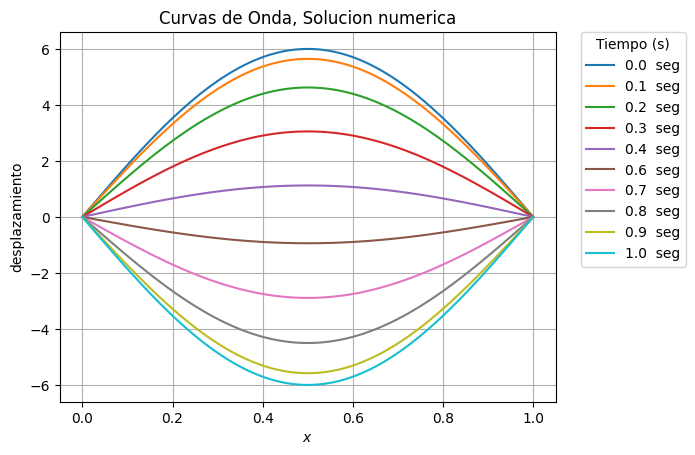

In [ ]:
# graph the solution
params={'legend.fontsize':5, 'legend.handlength':1}
Ndt=11

# labels and title
plt.xlabel(r"$x$")
plt.ylabel(r"desplazamiento")
plt.title(r"Curvas de Onda, Solucion numerica")

X =np.linspace(a,b, w.shape[0])
Ndt =110

for j in range(0, nt, Ndt):
    t = j*dt
    plt.plot(X, w[:, j], label=str(round(t,1)) + '  seg')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Tiempo (s)')

plt.grid(True)
plt.show()

## Animacion

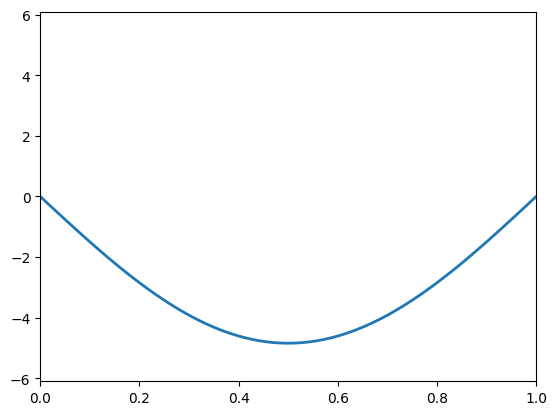

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

X = np.linspace(a, b, w.shape[0])

# create a dummy wavefield

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# set limits for plot
ax.set_xlim(0,1)
ax.set_ylim(-6.1, 6.1)

def init():
    line.set_data([],[])
    return line,

# update animation
def update(j):
    line.set_data( X, w[:, j])  # update wave from time j
    return line,

j_max=800
# anim = FuncAnimation(fig, update, frames=j_max, init_func=init, blit=True)
anim = FuncAnimation(fig, update, frames=j_max, init_func=init, blit=True, interval=20)
anim.save('waveimg.gif', writer='pillow')
plt.show()


## Analisis de error

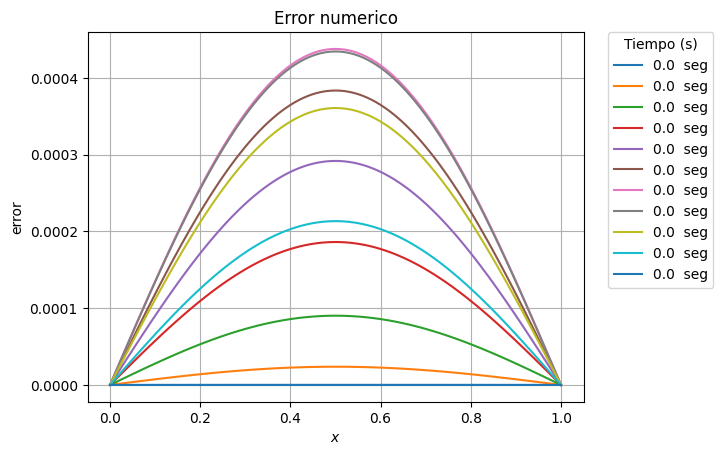

In [ ]:
nt=1001
dt=0.001
Nt=11
t0=0
error = np.zeros((nx, Nt+1))
skip=100

# calculo de error
k=0
for j in range(0, nt, skip):
    t = j*dt+t0
    for i in range(nx):
        error[i,k] = -( u(X[i], t) - w[i,j])
    k +=1

# graph of error
params={'legend.fontsize':5, 'legend.handlength':1}
Ndt=11

# labels and title
plt.xlabel(r"$x$")
plt.ylabel(r"error")
plt.title(r"Error numerico")

X = np.linspace(a,b, w.shape[0])
for j in range(Nt):
    t = j*dt+t0
    plt.plot(X, error[:, j], label=str(round(t,1)) + '  seg')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Tiempo (s)')

plt.grid(True)
plt.show()



## Ejemplo de inestabilidad

In [ ]:
dt=0.1
nt=11
w = w = solve_waveeq(v, a, b, t0, nt, nx, dt, e, f, p, q, g)

error: la condicion de estabilidad fue violada. Reduzca dt
dimensions of w (101, 11)


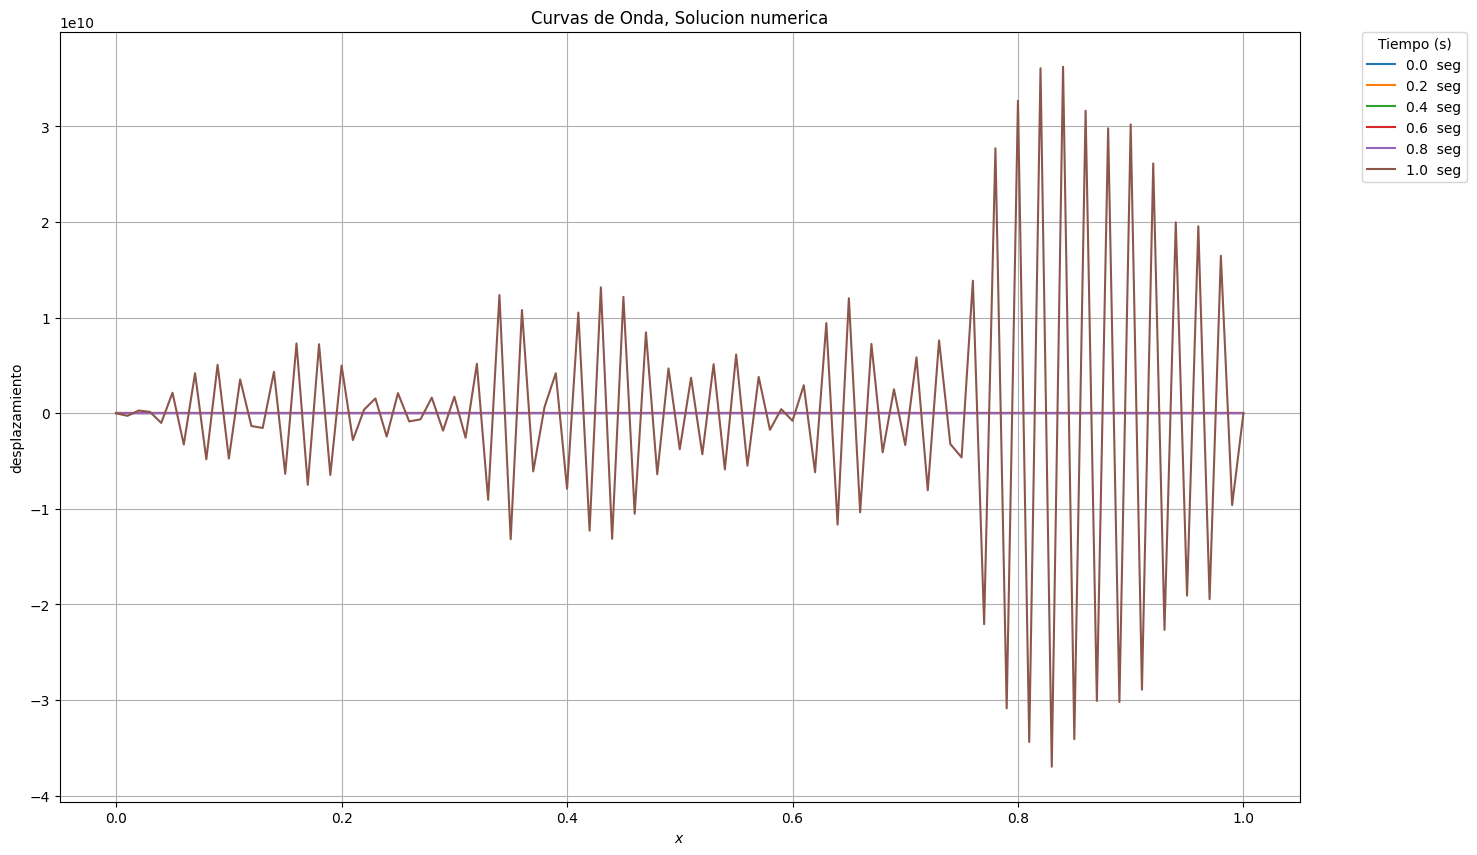

In [ ]:
# graficamos la solucion
params={'legend.fontsize':5, 'legend.handlength':1}

Ndt=2
t0=0
figure(figsize = (16,10))

# labels and title
plt.xlabel(r"$x$")
plt.ylabel(r"desplazamiento")
plt.title(r"Curvas de Onda, Solucion numerica")
X = np.linspace(a,b, w.shape[0])

for j in range(0, nt, Ndt):
    t = j*dt + t0
    plt.plot(X, w[:, j], label=str(round(t,1)) + '  seg')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Tiempo (s)')

plt.grid(True)
plt.show()

# Ejemplo con una condicion inicial Gaussiana

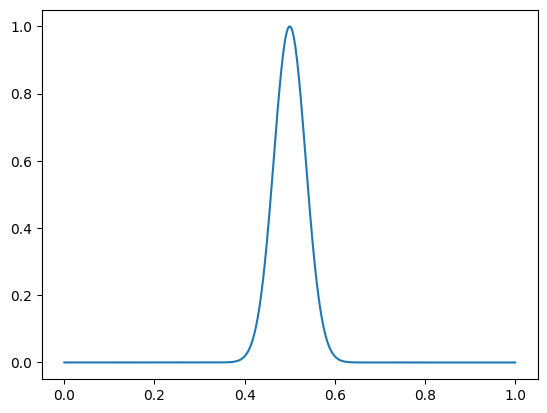

In [ ]:
# definamos la condicion inicial gaussiana
def p(x):
    return np.exp(-400*(x-0.5)**2)

# grafiquemos la condicion inicial
X = np.linspace(0,1,500)
plt.plot(X, p(X))
plt.show()



In [ ]:
# parametros
dt = 0.001
nt = 1001
nx=501
a=0
b=1
t0=0

w = solve_waveeq(v, a, b, t0, nt, nx, dt, e, f, p, q, g)

dimensions of w (501, 1001)


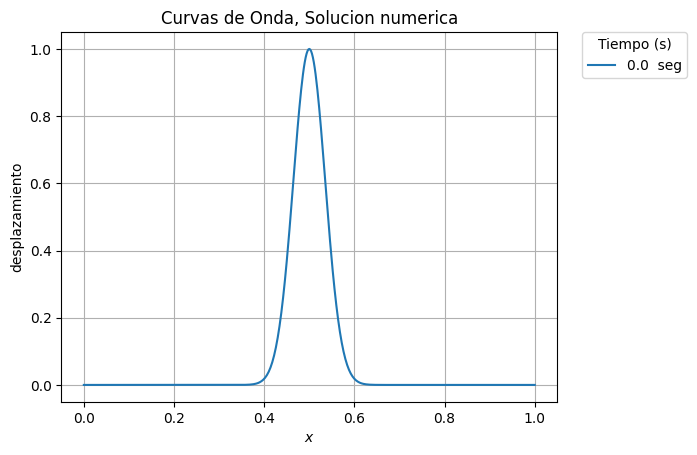

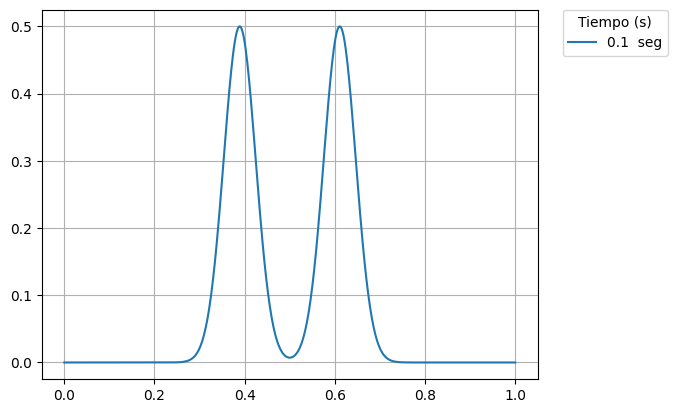

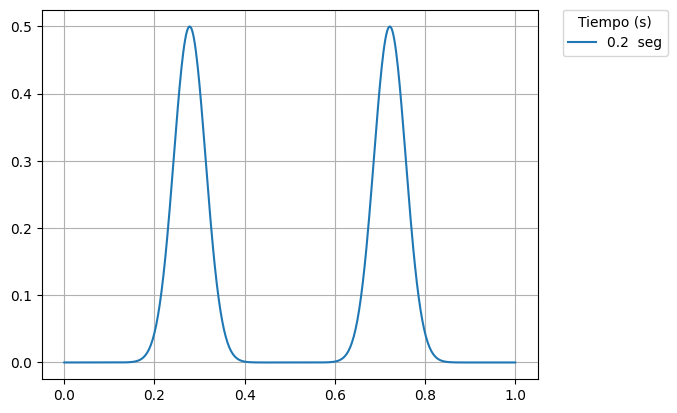

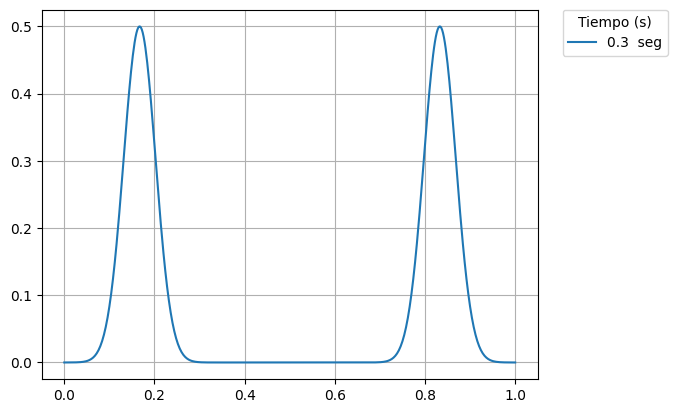

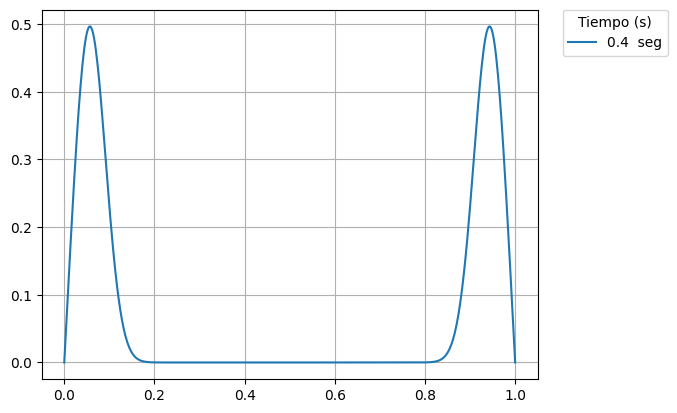

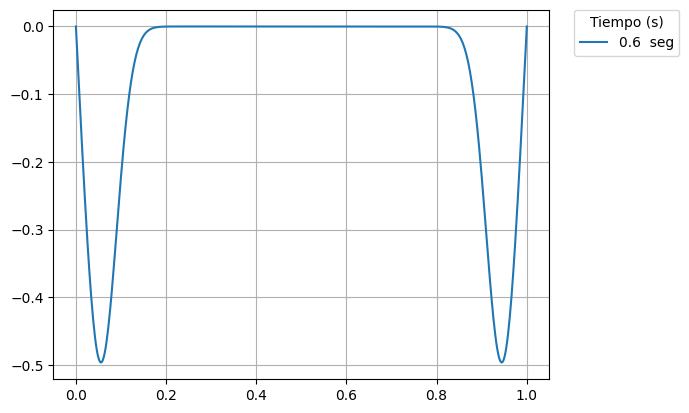

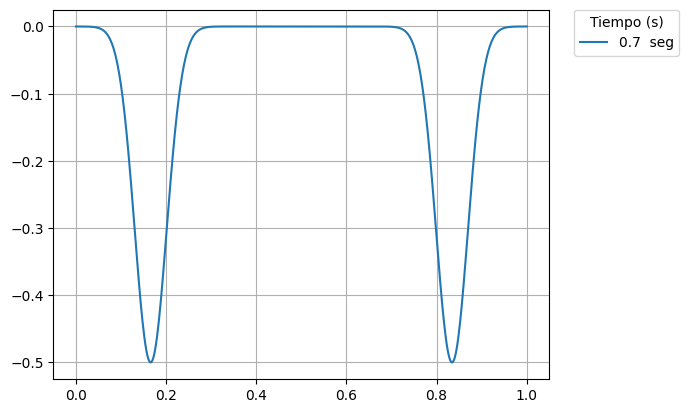

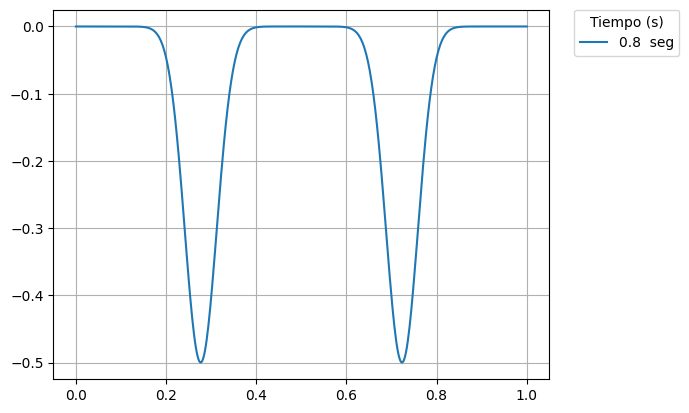

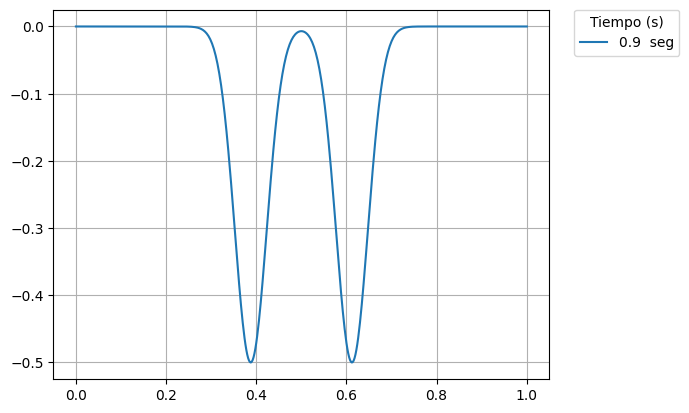

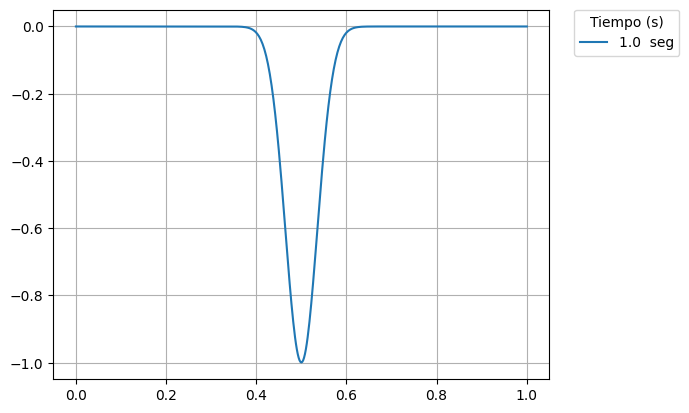

In [ ]:
# graficamos

Ndt=111
params={'legend.fontsize':5, 'legend.handlength':1}

plt.xlabel(r"$x$")
plt.ylabel(r"desplazamiento")
plt.title(r"Curvas de Onda, Solucion numerica")
X = np.linspace(a,b, w.shape[0])
for i in range(0, nt, Ndt):
    t = i*dt + t0
    plt.plot(X, w[:, i], label=str(round(t,1)) + '  seg')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Tiempo (s)')

    plt.grid(True)
    plt.show()
#

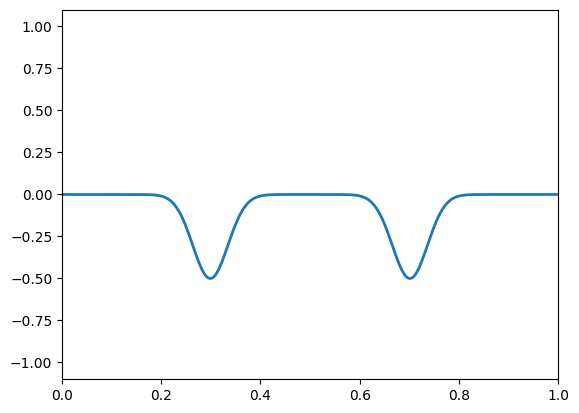

In [ ]:
# Let us do an animation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

X = np.linspace(a, b, w.shape[0])

# Create figure and axis for animation
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# Set limits for plot
ax.set_xlim(0,1)
ax.set_ylim(-1.1, 1.1)

# functio to initialize the animation
def init():
    line.set_data([],[])
    return line,

# Update animation
def update(j):
    line.set_data( X, w[:, j])  # Update wave from time j
    return line,

# function to update the animation for each rame (time step j)
def update(j):
    line.set_data( X, w[:, j])  # Update wave from time j
    return line,

# create animation
ani = FuncAnimation(fig, update, frames=j_max, init_func=init, blit=True, interval=20)
ani.save('waveimg.gif', writer='pillow')
plt.show()

# Metodos para verificar codigo
La idea esta en adivinar una solucion a la ecuacion de onda que cumpla cieras condiciones de frontera e iniciales.
Por ejemplo, queremos que las condiciones de frontera sean $0$.

Condiciones de bordo
$$u(0, t)=u(L,t)= 0 $$
Condicion inicial
$$u(x,0)= 0$$

Adivinamos una solucion con estas caracteristicas

$$u(x,t) = x(L-x) \sin t = x L \sin t - x^2 \sin t$$

Que hacemos ahora? metemos esta solucion en la ecuacion de onda y lo que de lo ponemos como fuente. Es decir,

$$u_x = L  \sin t - 2x  \sin t \quad, \quad u_{xx} = -2 \sin t \tag{1} $$
$$u_t = x L \cos t -x^2 \cos t \quad , \quad u_{tt}=-xL \sin t + x^2 \sin t = -x(L-x) \sin t \tag{2} $$

La ecuacion de onda es


$$u_{xx} - \frac{1}{c^2} u_{tt} = - g(x,t)  y (3)$$

De las ecuaciones (1) y (2)
$$-2 \sin t - \frac{1}{c^2} [ -x(L-x) \sin t ] = -g(x,t) $$

De donde

$$g(x,t) = 2 \sin t \left ( 1 + \frac{x(L-x)}{2 c^2}  \right ) $$

Esta es la ecuacion de onda que resolvemos.


# Ecuacion de adveccion (advection equations)
La ecuacion de onda $u_{xx} - u_{tt}/c^2=0$ (sin fuente) se puede factorizar en dos ecuacion. Es decir

$$\frac{\partial^2 u }{\partial x^2} - \frac{1}{c^2(x)} \frac{\partial^2 u}{\partial t^2} = 0 \Leftrightarrow
\left ( \frac{\partial}{\partial x} - \frac{1}{c(x)} \frac{\partial}{\partial t}  \right ) \left (
\frac{\partial}{\partial x} + \frac{1}{c(x)} \frac{\partial}{\partial t}    \right ) u = 0 $$


De forma que este sistema es equivalente a las siguientes dos ecuaciones

$$
\frac{\partial u}{\partial x} + \frac{1}{c^2(x)} \frac{\partial u}{\partial t} = 0  \quad , \quad
\frac{\partial u}{\partial x} - \frac{1}{c^2(x)} \frac{\partial u}{\partial t} = 0  \tag{3}
$$

Asumimos $c>0$ es constante, $x \in [a,b], a,b \in \mathbb{R}$, $a \ne b$.Cualquier funcion del tipo

$$u(x,t)=f(x-ct) $$
satisface la primera de las Ecuaciones (3). Es decir

$$u_x = f'(x-ct)  \quad , \quad u_t = -f'(x-ct)c $$
de forma que $u_x + u_t/c=0$. Esta ecuacion representa un pulso viajando a la derecha. Definamos una condicion inicial $t=t_0$.

$$u(x,t_0) = p(x) $$
esta condicion inicial determina la forma del pulso.
Debemos definir condiciones de bordo consistentes con esto
$x=a, x=b$.

* Para $u=f(x-ct)$
$$u(a,t) = f(a - ct) = f(a + ct_0 - c t_0 - ct) = f(a + c(t_0-t) - c t_0) = p[a + c(t_0 -t)] $$
Verifiquemos esto


$$p[a + c(t_0 -t)] = u( a + c(t_0 -t), t_0)= f( a+ c(t_0 -t) - ct_0) = f(a-ct) $$


De igual forma para $x=b$

$$u(b,t) = f(b-ct) = f(b+ct_0 - c t_0 -ct) = f( b + (c (t_0-t) - t_0) =
p[b + c(t_0 - t)] $$

De esta forma podems escribir el problema

$$u_x + \frac1c u_t = 0 $$
$$u(x,t_0 = p(x)  \quad , \quad u(a,t) = p[a + c(t_0 -t)
\quad , \quad u(b,t) = p[b + c(t_0 -t) $$


* Para $u=f(x+ct)$

Aca $u_x = f'(x + ct)$, $u_t = f'(x+ct)c$

La condicion inicial es

$$u(x,t_0 )= f(x + ct_0) = p(x) $$
Esta condicion inicial determina el pulso de la onda viajando a la izquierda.

Asi como hicimos en el analisis de arriba
para $x=a$ y luego para $x=b$

$$x=a $$
$$u(a,t) = f(a + ct) = f(a -c t_0 + c t_0 + ct) = f[ a - c(t_0 -t) + c t_0 = p[a - c(t_0 -t)]$$

De igual forma en $x=b$

$$u(b,t) = f(b + ct) = f(b - c t_0 + c t_0 + ct) = f[b -c(t_0 -t) c t_0] = p[b - c(t_0 -t)] $$
Escribimos

$$u_x - \frac{1}{c} u_t = 0 $$
$$u(x,t_0) = p(x)  \quad , \quad u(a,t) = p[a - c(t_0-t)] \quad  , \quad u(b,t) = p[b - c(t_0 -t)] $$


En lo que sigue tenemos las siguientes tareas:
1. Hallar las moleculas de diferencias finintas para estas ecuaciones
2. Condicion de estabilidad.
3. Formular el problema de forma matricial.
4. Implementacion numerica.

## Esquema de diferencias finitas. Progresivo en tiempo y central en espacio.

$$u_t + c u_x = 0 $$

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = -c \frac{w_{i+1 \; j}- w_{i-1 \; j}}{2 \Delta x}$$
Es de precicion $\mathcal{O}(\Delta t)$ y $\mathcal{O}(\Delta^2 x)$.

Despejamos $w_{i j+1}$

$$w_{i j+1} = -\frac12 \gamma ( w_{i+1 j} - w_{i-1 j}) + w_{ij} $$
donde $\gamma=-c \Delta t/\Delta x$.

Haremos el analisis de von Neumann. Es decir asumimos
$w_{ij}=\mathrm{e}^{\mathrm{i} \omega t_j} \mathrm{e}^{\mathrm{i} k x_i}$
y dividimos por $w_{ij}$.


$$\mathrm{e}^{\mathrm{i} \Delta t} = -\frac12 \gamma (\mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i} k \Delta x}) + 1 $$

Usando las identidades de Euler

$$\mathrm{e}^{\mathrm{i} \Delta t} = -\gamma \mathrm{i} \sin k \Delta x + 1$$
La magnitud de este complejo es $|z| = \sqrt{a^2 + b^2}$ para $z=a + \mathrm{i} b$, $a, b \in \mathbb{R}$.

$$| G | = | \mathrm{e}^{\mathrm{i} \Delta t}|
= \sqrt{1 + \gamma^2 \sin^2 k \Delta x} \ge 1.$$

El sistema es inestable.

Tratemos otro esquema.
## Progresivas tanto en tiempo como en espacio.

$$\frac{w_{i j+1} - w_{ij}}{\Delta t} = -c \frac{w_{i+1 j} - w_{i j}}{\Delta x} $$
La precision es $\mathcal{O}(\Delta t)$ y $\mathcal{O}(\Delta x)$.

Despejamos $w_{i j+1}$

$$w_{i j+1} = -\gamma ( w_{i+1 j} - w_{ij}) + w_{ij} $$

$$w_{i j+1} = -\gamma w_{i+1 j} + (1 + \gamma) w_{ij} $$

De nuevo hacemos el analisis de von Neumann definimos
$w_{ij} = \mathrm{e}^{\mathrm{i} \omega \Delta t} \mathrm{e}^{\mathrm{i} k \Delta x} $ y dividimos todo por $w_{ij}$.

Recuerde la identidad de Euler $\mathrm{e}^{\mathrm{i} \theta}= \cos \theta + \mathrm{i} \sin \theta$,

$$ G = \mathrm{e}^{\mathrm{i} \Delta t}  = -\gamma \mathrm{e}^{\mathrm{i} k \Delta x} + (1 + \gamma) = -\gamma (\cos k \Delta x) + \mathrm{i} \sin k \Delta x)  + 1 + \gamma = [-\gamma \cos k \Delta x + 1 + \gamma] - \mathrm{i} \sin k \Delta x$$

De donde

$$|G | = \sqrt{(1 + \gamma - \gamma \cos k \Delta x)^2 + \gamma^2 \sin^2 k \Delta x)} \ge 1$$
pues

$$(1 + \gamma - \gamma \cos k \Delta x) = 1 + \gamma(1 - \cos k \Delta x) $$
pero $1 - \cos k \Delta x \ge 0$, entonces

$$(1 + \gamma - \gamma \cos k \Delta x) \ge 1 $$

O sea que este esquema tampoco es bueno.

Tratamos
## Crank-Nicholson

La parte espacial es un promedio de dos temporales
El esquema es

$$w_{i j+1} = -\frac{\gamma}{4} ( w_{i+1 j+1} - w_{i-1 j+1}) - \frac{\gamma}{4} (w_{i+1 j} - w_{i-1 j}) + w_{ij} $$

De nuevo hacemos el analisis de von Neumann definimos
$w_{ij} = \mathrm{e}^{\mathrm{i} \omega \Delta t} \mathrm{e}^{\mathrm{i} k \Delta x} $ y dividimos todo por $w_{ij}$ y obtenemos


$$G = \mathrm{e}^{\mathrm{i} \omega \Delta t} = -\frac{\gamma}{4} ( \mathrm{e}^{\mathrm{i} (k \Delta x + \omega \Delta t)} - \mathrm{e}^{i( \omega \Delta t - k \Delta x)}) - \frac{\gamma}{4} (\mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i} k \Delta x}) + 1.$$

Usamos las identidades de Euler.




$$G = \mathrm{e}^{\mathrm{i} \omega \Delta t} = -\frac{\gamma}{4} (2 \mathrm{i} \mathrm{e}^{\mathrm{i} \omega \Delta } \sin k \Delta x + 2 \mathrm{i} \sin k \Delta x) + 1 . $$

Agrupamos para tener $\mathrm{e}^{\mathrm{i} \omega \Delta t}$ en un lado
Factoricelo

$$\mathrm{e}^{\mathrm{i} \omega \Delta t} \left (1 + \frac{\gamma}{2} \mathrm{i} \sin k \Delta x  \right ) = 1 - \frac{\gamma}{2} \mathrm{i} \sin k \Delta x$$

Despejamos $\mathrm{e}^{\mathrm{i} \omega \Delta t}$.

$$\mathrm{e}^{\mathrm{i} \omega \Delta t} = \frac{1 - \mathrm{i} \frac{\gamma}{2} \sin k \Delta x}{1 + \mathrm{i} \frac{\gamma}{2} \sin k \Delta x} $$

Y como si $a+\mathrm{i} b$ con $a, b \in \mathbb{R}$ es un complejo
la magnitud $|( a - \mathrm{i} b)/(a - \mathrm{i} b) |
=\sqrt{a^2 + b^2}/\sqrt{a^2 + b^2}= 1$.

O sea que $| G | = 1$ y el sistema es incondicionalmente estable.

Veamos la forma matricial.


De Crank-Nicholson tenemos:
$$w_{i j+1} = -\frac{\gamma}{4} ( w_{i+1 j+1} - w_{i-1 j+1}) - \frac{\gamma}{4} (w_{i+1 j} - w_{i-1 j}) + w_{ij} $$

Es decir

$$-\frac{\gamma}{4} w_{i-1 j+1} + w_{i j+1} + \frac{\gamma}{4} w_{i+1 j+1} = \frac{\gamma}{4} w_{i-1 j} + w_{ij} - \frac{\gamma}{4} w_{i+1 j} \tag{4}  $$

Tarea: Dibuje la molecula.

Necesitamos los bordos.
Comenzamos con $j=0$. $w_{io}=p_i$. Las condiciones de frontera son
$w_{0j}=e_j$, $w-{nx-1} = f_x$. Del sistema (4) para $i=1$

* $i=1$
$$-\frac{\gamma}{4} w_{0 j+1} + w_{1 j+1} + \frac{\gamma}{4} w_{1 j+1} = \frac{\gamma}{4} w_{0 j} + w_{1j} - \frac{\gamma}{4} w_{2 j}  $$
Reorganizamos (tiramos los indices 0 a la derecha

$$w_{1 j+1} + \frac{\gamma}{4} w_{2 j+1} = w_{1j} - \frac{\gamma}{4} w_{2j} + \frac{\gamma}{4} w_{0 j+1} + \frac{\gamma}{4} w_{0j} $$



* $i=n-2$
$$-\frac{\gamma}{4} w_{n-3 j+1} + w_{n-2 j+1} + \frac{\gamma}{4} w_{n-1 j+1} = \frac{\gamma}{4} w_{n-3 j} + w_{n-2 j} - \frac{\gamma}{4} w_{n-1 j}  $$

Reorganizando, pasando los $n-1$ a la derecha
$$-\frac{\gamma}{4} w_{n-3 j+1} + w_{n-2 j+1} + = \frac{\gamma}{4} w_{n-3 j} + w_{n-2 j} - \frac{\gamma}{4} w_{n-1 j} - \frac{\gamma}{4} w_{n-1 j+1}   $$

El sistema matricial queda

$$A w_{j+1} = B w_j + b $$

Donde


$$A =  
\begin{pmatrix}
1 & \frac{\gamma}{4} & 0 & 0 & \cdots & 0 \\
-\frac{\gamma}{4} & 1 & \frac{\gamma}{4} & 0 & \cdots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots  & \vdots  \\
\vdots & \ddots & \ddots & -\frac{\gamma}{4} & 1 & \frac{\gamma}{4} \\
0 & \cdots & \cdots & \cdots & -\frac{\gamma}{4} & 1
\end{pmatrix}
$$

$$w_{j+1} =
\begin{pmatrix}
w_{1 j+1 } \\
w_{2 j+1 } \\
\vdots \\
\vdots \\
w_{n-2 j+1}
\end{pmatrix}
 $$

$$B =  
\begin{pmatrix}
1 & -\frac{\gamma}{4} & 0 & 0 & \cdots & 0 \\
\frac{\gamma}{4} & 1 & -\frac{\gamma}{4} & 0 & \cdots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots  & \vdots  \\
\vdots & \ddots & \ddots & \frac{\gamma}{4} & 1 & -\frac{\gamma}{4} \\
0 & \cdots & \cdots & \cdots & \frac{\gamma}{4} & 1
\end{pmatrix}
$$

$$w_{j} =
\begin{pmatrix}
w_{1 j } \\
w_{2 j } \\
\vdots \\
\vdots \\
w_{n-2 j}
\end{pmatrix}
$$

Por ultimo

$$b = \frac{\gamma}{4}
\begin{pmatrix}
 w_{0 j+1} +  + w_{0j} \\
 0 \\
 \vdots \\
 0 \\
 -w_{n-1 j+1} - w_{n-1 j}
\end{pmatrix}
 $$
